In [1]:
!pip install plotly

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *
import nrrd

/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
data, header = nrrd.read('path/to/file.nrrd')

In [6]:
image_data, image_header = nrrd.read('51d.img.nrrd')
label_data, label_header = nrrd.read('51d.seg.nrrd')

In [8]:
image_data.min(), image_data.max()

(-1024, 3071)

In [10]:
image_header

OrderedDict([('type', 'short'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([512, 512, 221])),
             ('space directions',
              array([[0.57421875, 0.        , 0.        ],
                     [0.        , 0.57421875, 0.        ],
                     [0.        , 0.        , 1.5       ]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'gzip'),
             ('space origin',
              array([-148.71289062, -302.21289063, -341.5       ]))])

In [43]:
def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    
    return window_image

In [44]:
image = image_data.astype(float)

In [45]:
window_center = 100
window_width = 200

windowed_image = window_image(image, window_center, window_width)

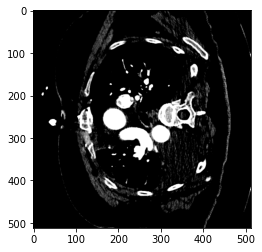

In [48]:
plt.imshow(windowed_image[:,:,0], cmap='gray')

In [9]:
label_data.min(), label_data.max()

(0, 3)

In [11]:
label_header

OrderedDict([('type', 'unsigned char'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([512, 512, 221])),
             ('space directions',
              array([[0.57421875, 0.        , 0.        ],
                     [0.        , 0.57421875, 0.        ],
                     [0.        , 0.        , 1.5       ]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('encoding', 'gzip'),
             ('space origin',
              array([-148.71289062, -302.21289063, -341.5       ])),
             ('Segment0_Color', '0.666667 0 0'),
             ('Segment0_ColorAutoGenerated', '0'),
             ('Segment0_Extent', '192 304 157 178 81 85'),
             ('Segment0_ID', 'Segment_1'),
             ('Segment0_LabelValue', '1'),
             ('Segment0_Layer', '0'),
             ('Segment0_Name', 'R calc 1'),
             ('Segment0_NameAutoGenerated', '0'),
             ('Segment0_Tags',
              'Seg

In [21]:
image_data.shape

(512, 512, 221)

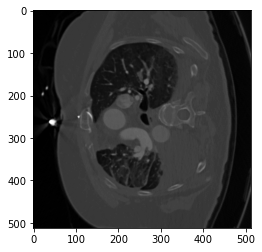

In [29]:
plt.imshow(image_data[:,:,0], cmap='gray')
plt.show()

In [30]:
image2_data, image2_header = nrrd.read('61d.img.nrrd')
label2_data, label2_header = nrrd.read('61d.seg.nrrd')

In [31]:
image2_data.min(), image2_data.max()

(-1024, 3071)

In [32]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/ESUS/'

In [34]:
ids=[]
for f in os.listdir(DATAPATH):
    if f.endswith('.img.nrrd'):
        current_id = f.split('.')[0]
        ids += [int(current_id)]
        ids = sorted(ids)

print(ids)


[2, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 29, 31, 32, 33, 35, 36, 39, 40, 41, 45, 46, 47, 48, 49, 50, 51, 52, 53, 57, 61, 62, 63, 64, 66, 69, 71, 72, 73, 75, 77, 79, 82, 83, 84, 86, 87, 88, 90, 91, 92, 93, 94, 96, 97]


In [38]:
len(ids)

64

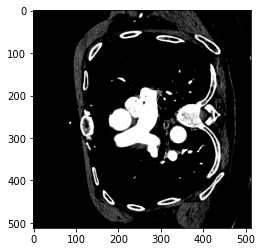

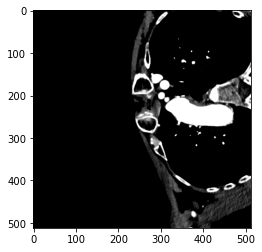

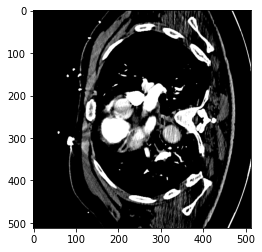

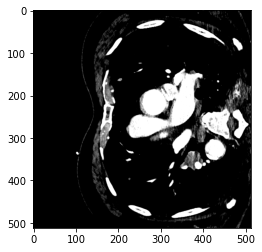

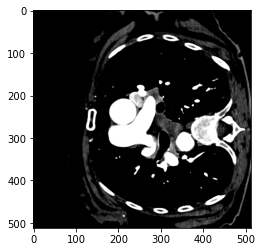

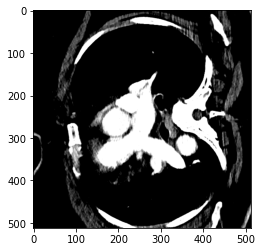

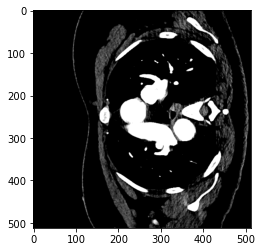

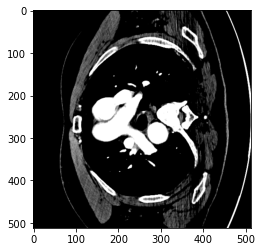

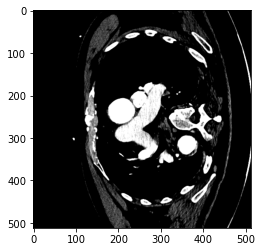

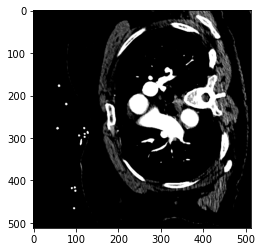

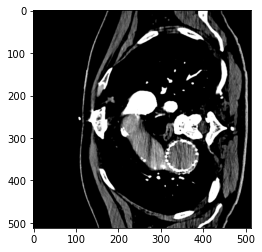

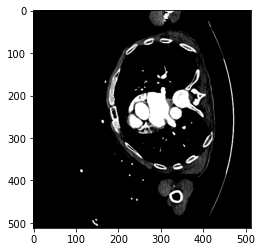

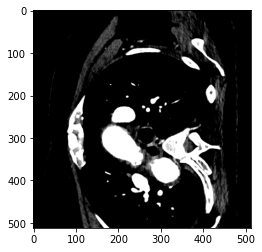

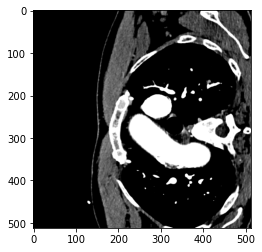

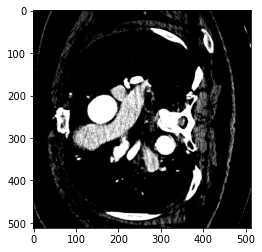

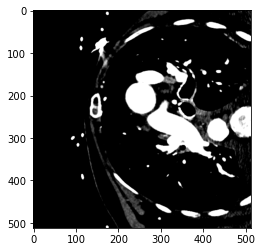

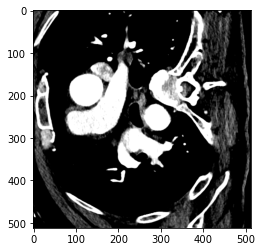

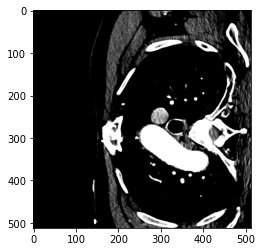

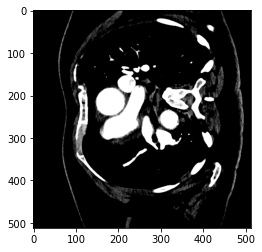

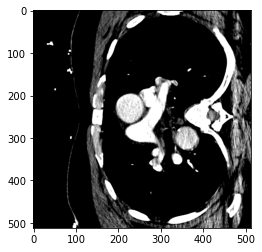

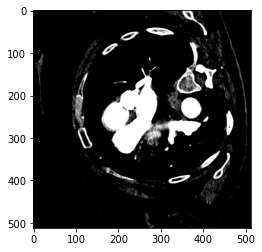

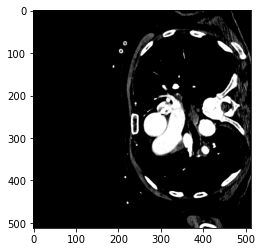

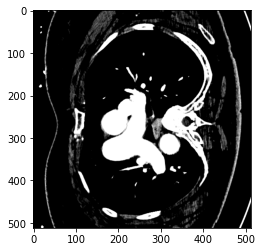

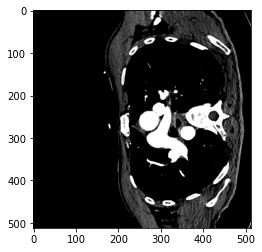

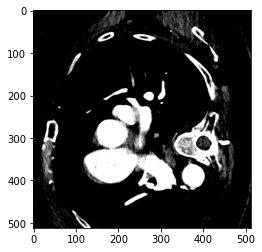

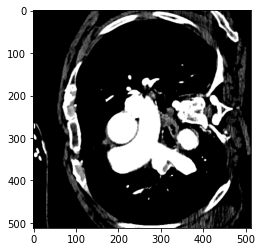

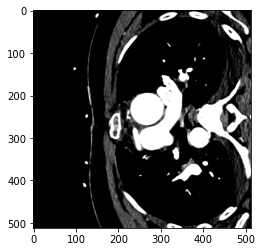

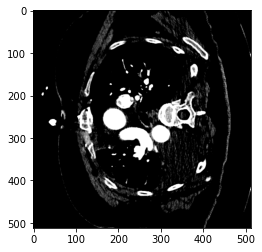

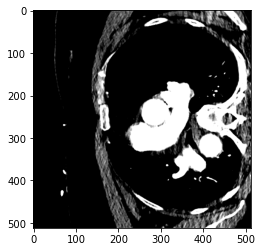

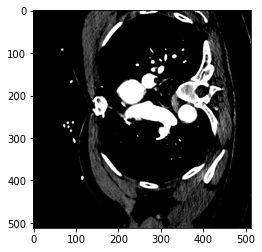

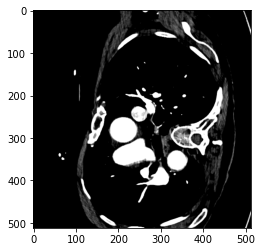

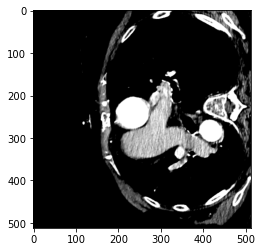

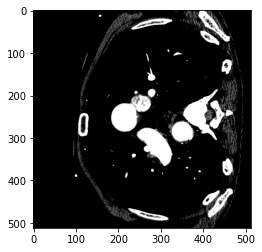

KeyboardInterrupt: 

In [49]:
for i in range(len(ids)):
    if os.path.isfile(DATAPATH + str(ids[i]) + '.img.nrrd'):
        im, h = nrrd.read(DATAPATH + str(ids[i]) + '.img.nrrd')
        #print(im.min(), im.max())
    elif os.path.isfile(DATAPATH + str(ids[i]) + '.a.img.nrrd'):
        im, h = nrrd.read(DATAPATH + str(ids[i]) + '.a.img.nrrd')
        #print(im.min(), im.max())
    
    image = im.astype(float)
    window_center = 100
    window_width = 200

    windowed_image = window_image(image, window_center, window_width)
    
    plt.imshow(windowed_image[:,:,0], cmap='gray')
    plt.show()

In [40]:
im, h = nrrd.read(DATAPATH + str(10) + '.img.nrrd')
rescale_slope = image_header.get("RescaleSlope")
rescale_intercept = image_header.get("RescaleIntercept")
print(f"slope: {rescale_slope}, intercept: {rescale_intercept}")

slope: None, intercept: None
